# Random Graphs

In [1]:
from itertools import permutations
from math import factorial
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np 
import scipy as sp

from utils import show_graph, styles

%matplotlib inline

## Erdös-Rényi Random Graph
- also called a binomial graph or G(n,p)
- n nodes, an edge e=(n1, n2) exists with probablity p

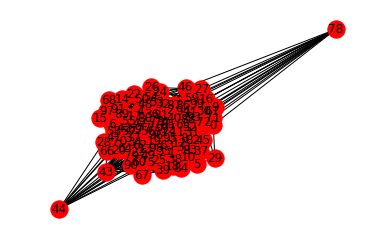

In [2]:
G = nx.erdos_renyi_graph(n=100, p=0.2, directed=False)
nx.draw_networkx(G)
show_graph()

The _degree_ $k_i$ of a node $v_i$ is the number of immediate neighbours it has. In other words, how many other nodes it is connected to be an edge

In [3]:
random_node = np.random.randint(100)
G.degree(random_node) == len(G.neighbors(random_node))

True

## Probability of a node having degree $k$
In a random graph, the expected degree of a node equals $$ P(k_i=k) = {N \choose k} p^k (1− p)^{N−1−k}$$

In [4]:
def choose(n, k):
    '''Number of ways to choose k items from n items.
    
    For efficiency prefer scipy.misc.comb(n, k) instead.
    '''
    return factorial(n) // (factorial(n - k) * factorial(k))

def p_of_degree(k, n, p):
    '''Probability a node in a binomial graph G(n, p) has degree k.'''
    return choose(n-1, k) * p**k * (1-p)**(n-1-k)

The number of nodes in a grpah is called its order and in networkx `G.number_of_nodes() == G.order()`. 

0.2 was the probaility we set for our Erdös-Rényi graph

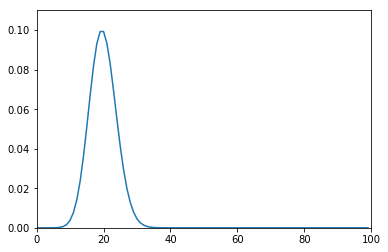

In [5]:
plt.plot([p_of_degree(k, G.number_of_nodes(), 0.2)
          for k in range(G.number_of_nodes())])
plt.ylim(0,0.11)
plt.xlim(0,100);

## Average degrees $\langle k \rangle$ of a node 

- Equal to the number of possible successor nodes $N - 1$ times the probability $p$ of an edge connecting them.
- So, for large $N$, roughly $Np$

In [6]:
def expected_degree(n, p):
    '''Average degree of a node in binomial graph G(n, P)'''
    return (n-1) * p

expected_degree(100, 0.2)

19.8

## Relationship	of	$\langle k \rangle$	and	graph connectedness	
- $\langle k \rangle =$ `average_degree(np)`
- If $\langle k \rangle < 1$, graph is disconnected
- If $\langle k \rangle > 1$, graph has a giant component
- If $\langle k \rangle \geqslant ln(N)$, graph	is	totally	connected	

## Average length $L$ of a path in a random graph
- A _path_ is a set of nodes where each pair of consecutive nodes is connected by an edge
- The number n of nodes at distance L is $n = \langle k \rangle^L$
- The avergae path length is roughly equal to $\frac{ log(n) }{ log(\langle k \rangle)}$

In [7]:
def average_path(n, p):
    '''Average path length in binomial graph G(n, p)'''
    return np.log(n) / np.log(expected_degree(n, p))

average_path(100, 0.2)

1.54241820866388

# Clustering coefficient 
The	_proportion_ of	A’s	neighbours $N(A)$ connected by an edge. [Wiki](https://en.wikipedia.org/wiki/Clustering_coefficient)

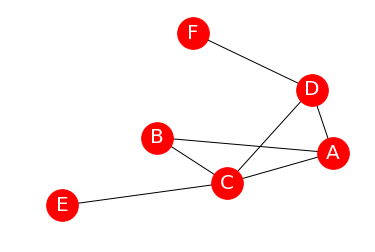

In [8]:
G = nx.Graph()
G.add_edges_from([('A','B'),
                  ('A','C'),
                  ('A','D'),
                  ('B','C'),
                  ('C','D'),
                  ('C','E'),
                  ('D','F')
                 ])

nx.draw_networkx(G, pos=nx.spring_layout(G), **styles)
show_graph()

### Local clustering coefficient $C_i$
- Gives an indication of the embeddedness of single nodes
- Quantifies how close the neighbours of a node $v_i$ are to being a _clique_ (a complete graph)

An edge $e_{ij}$ connects node $v_{i}$ with node $v_{j}$. The neighbours $N_i$ of a node $v_i$ is the set of its immediately connected neighbours
$$N_i = \{ v_j : e_{ij} \in E \lor e_{ji} \in E \}$$
Recall that the degree $k_i$ of a node is the size of the neighbourhood $N_i$

#### The local clustering coefficient $C_i$  is the proportion of links between the nodes within its neighbourhood divided by the number of links that could possibly exist between them

$$ C_i = \frac{ 2|e_{jk}| }{ k_i(k_i-1)} : v_j, v_k \in N_i, e_{jk} \in E $$



In [9]:
def local_clustering_coef(G, v):
    '''Proportion of edges to possible edges
    between neighbours of node v in graph G.'''
    k = G.degree(v) 
    possible_links = k * (k - 1)
    if possible_links == 0:
        return 0.0
    else:
        actual_links = len([e for e in permutations(G.neighbors(v), 2)
                            if e in G.edges()])
        return float(2 * actual_links) / possible_links

def clustering(G, v=None):
    '''Local clustering coefficient for nodes in G.
    
    For efficiency prefer nx.clustering(G, nodes=None)
    '''
    if  v:
        return local_clustering_coef(G, v)
    else:
        return {v: local_clustering_coef(G, v)
                for v in G.nodes()}

In [10]:
clustering(G)

{'A': 0.6666666666666666,
 'B': 1.0,
 'C': 0.3333333333333333,
 'D': 0.3333333333333333,
 'E': 0.0,
 'F': 0.0}

Average clustering coefficient $\overline{C}$
- Gives an overall indication of the clustering in the network.
- Equals the average of the local clustering coefficients of all the nodes $n$ 
$$ \overline{C} = \frac{1}{n} \sum_{i=1}^{n} C_i $$

- Some have suggested isolated nodes (nodes with a zero clustering coefficient) be removed from the average to avoid underestimation of the neighborhood clustering in sparse networks

In [11]:
def average_clustering(G, include_isolated=True):
    '''Average clustering of in graph G.'''
    C = clustering(G).values()
    if not include_isolated:
        C = [c_i for c_i in C if c_i > 0]
    return sum(C) / float(len(C))

In [12]:
average_clustering(G)

0.3888888888888889